# Facial Expression Recognition - Final Version
With MobileNetV2, fine-tuning, class weights, and mixed-size image support.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set Paths
train_path = "C:/Users/MAXQUANTA-INDUSTRIES/Desktop/ER-2/E-3/dataset/train"
test_path = "C:/Users/MAXQUANTA-INDUSTRIES/Desktop/ER-2/E-3/dataset/test"
img_size = (224, 224)

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    brightness_range=[0.8, 1.2],
    validation_split=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path, target_size=img_size, batch_size=32,
    class_mode='categorical', subset='training', shuffle=True,
    interpolation='bilinear'
)

val_generator = train_datagen.flow_from_directory(
    train_path, target_size=img_size, batch_size=32,
    class_mode='categorical', subset='validation', shuffle=False,
    interpolation='bilinear'
)

test_generator = test_datagen.flow_from_directory(
    test_path, target_size=img_size, batch_size=32,
    class_mode='categorical', shuffle=False,
    interpolation='bilinear'
)


Found 7146 images belonging to 7 classes.
Found 792 images belonging to 7 classes.
Found 1869 images belonging to 7 classes.


In [2]:
# Compute Class Weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))


In [3]:
# Build MobileNetV2 Model with Fine-Tuning
def build_mobilenet_model(input_shape, num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = True  # Unfreeze for fine-tuning

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = img_size + (3,)
num_classes = train_generator.num_classes
model = build_mobilenet_model(input_shape, num_classes)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]


In [4]:
# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=80,
    class_weight=class_weights,
    callbacks=callbacks
)


c:\Users\MAXQUANTA-INDUSTRIES\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3275 - loss: 1.6985

224/224 ━━━━━━━━━━━━━━━━━━━━ 952s 4s/step - accuracy: 0.3280 - loss: 1.6976 - val_accuracy: 0.3636 - val_loss: 1.7742
Epoch 2/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6448 - loss: 1.1192

224/224 ━━━━━━━━━━━━━━━━━━━━ 892s 4s/step - accuracy: 0.6449 - loss: 1.1190 - val_accuracy: 0.4899 - val_loss: 1.5040
Epoch 3/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 913s 4s/step - accuracy: 0.7474 - loss: 0.9436 - val_accuracy: 0.5290 - val_loss: 1.5640
Epoch 4/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7940 - loss: 0.8676

224/224 ━━━━━━━━━━━━━━━━━━━━ 920s 4s/step - accuracy: 0.7940 - loss: 0.8675 - val_accuracy: 0.6061 - val_loss: 1.4811
Epoch 5/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 912s 4s/step - accuracy: 0.8267 - loss: 0.8115 - val_accuracy: 0.6048 - val_loss: 1.5120
Epoch 6/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8368 - loss: 0.7779

224/224 ━━━━━━━━━━━━━━━━━━━━ 917s 4s/step - accuracy: 0.8368 - loss: 0.7778 - val_accuracy: 0.6199 - val_loss: 1.3899
Epoch 7/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8598 - loss: 0.7415

224/224 ━━━━━━━━━━━━━━━━━━━━ 899s 4s/step - accuracy: 0.8598 - loss: 0.7415 - val_accuracy: 0.7096 - val_loss: 1.0467
Epoch 8/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8725 - loss: 0.7219

224/224 ━━━━━━━━━━━━━━━━━━━━ 881s 4s/step - accuracy: 0.8725 - loss: 0.7219 - val_accuracy: 0.7538 - val_loss: 1.0142
Epoch 9/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8926 - loss: 0.6911

224/224 ━━━━━━━━━━━━━━━━━━━━ 874s 4s/step - accuracy: 0.8926 - loss: 0.6912 - val_accuracy: 0.7803 - val_loss: 0.9324
Epoch 10/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 871s 4s/step - accuracy: 0.8967 - loss: 0.6739 - val_accuracy: 0.7311 - val_loss: 1.0752
Epoch 11/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 872s 4s/step - accuracy: 0.9140 - loss: 0.6469 - val_accuracy: 0.7538 - val_loss: 1.0784
Epoch 12/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 874s 4s/step - accuracy: 0.9159 - loss: 0.6331 - val_accuracy: 0.7462 - val_loss: 1.0502
Epoch 13/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9247 - loss: 0.6279

224/224 ━━━━━━━━━━━━━━━━━━━━ 873s 4s/step - accuracy: 0.9247 - loss: 0.6279 - val_accuracy: 0.7891 - val_loss: 0.9292
Epoch 14/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 871s 4s/step - accuracy: 0.9282 - loss: 0.6125 - val_accuracy: 0.7702 - val_loss: 0.9697
Epoch 15/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9417 - loss: 0.6033

224/224 ━━━━━━━━━━━━━━━━━━━━ 873s 4s/step - accuracy: 0.9417 - loss: 0.6033 - val_accuracy: 0.8030 - val_loss: 0.8687
Epoch 16/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9395 - loss: 0.6003

224/224 ━━━━━━━━━━━━━━━━━━━━ 873s 4s/step - accuracy: 0.9395 - loss: 0.6003 - val_accuracy: 0.8371 - val_loss: 0.8304
Epoch 17/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 873s 4s/step - accuracy: 0.9482 - loss: 0.5798 - val_accuracy: 0.7854 - val_loss: 0.9418
Epoch 18/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 871s 4s/step - accuracy: 0.9499 - loss: 0.5833 - val_accuracy: 0.8182 - val_loss: 0.8630
Epoch 19/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 873s 4s/step - accuracy: 0.9565 - loss: 0.5718 - val_accuracy: 0.8194 - val_loss: 0.8648
Epoch 20/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 873s 4s/step - accuracy: 0.9506 - loss: 0.5781 - val_accuracy: 0.8169 - val_loss: 0.8917
Epoch 21/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9634 - loss: 0.5504

224/224 ━━━━━━━━━━━━━━━━━━━━ 872s 4s/step - accuracy: 0.9633 - loss: 0.5504 - val_accuracy: 0.8346 - val_loss: 0.8217


59/59 ━━━━━━━━━━━━━━━━━━━━ 52s 848ms/step

Classification Report:

              precision    recall  f1-score   support

       Angry       0.91      0.82      0.87       312
       Happy       0.83      0.99      0.90       314
     Neutral       0.78      0.83      0.80       317
         Sad       0.90      0.74      0.81       327
    Surprise       0.84      0.93      0.88       328
     disgust       1.00      0.95      0.98       109
        fear       0.97      0.86      0.92       162

    accuracy                           0.87      1869
   macro avg       0.89      0.87      0.88      1869
weighted avg       0.87      0.87      0.87      1869



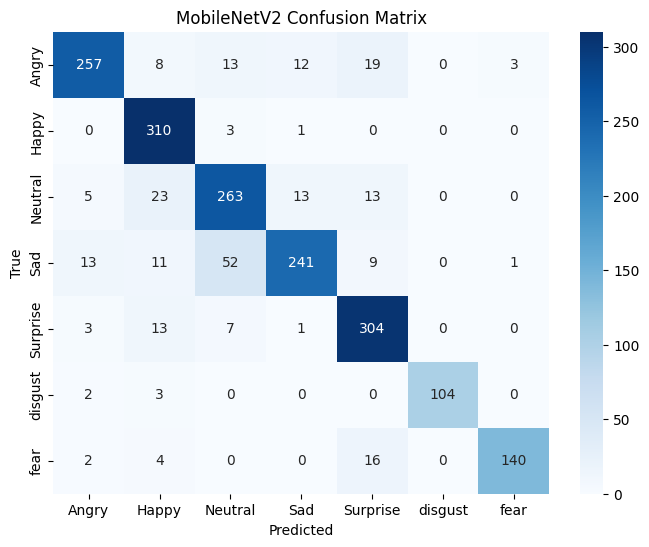

In [5]:
# Evaluate on Test Set
y_pred = model.predict(test_generator)
y_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_classes, target_names=labels))

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MobileNetV2 Confusion Matrix')
plt.show()


In [2]:
np.save("training_history.npy", history.history)


NameError: name 'history' is not defined